<a href="https://colab.research.google.com/github/hqu/exponential-growth-visualization/blob/main/Epidemic_Simulation_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
G = nx.Graph()
G.clear()

In [ ]:
def get_infected_nodes():
    infected_nodes = [x for x,y in G.nodes(data=True) if y['state']==1]
    return infected_nodes
def get_recovered_nodes():
    recovered_nodes = [x for x,y in G.nodes(data=True) if y['state']==2]
    return recovered_nodes
def get_susceptible_nodes():
    susceptible_nodes = [x for x,y in G.nodes(data=True) if y['state']==0]
    return susceptible_nodes

In [ ]:
def print_stats():
    r0 = round(((alpha*avg_deg)/mu), 2)
    print("R0: ", r0)
    print("Peak cases: ", max(epi_curve_data))
    print("Peak time period: ", epi_curve_data.index(max(epi_curve_data)))
    print("Total time periods: ", num_periods)        
    print("Average contacts: ", round(avg_deg, 0))
    print("Healthy left: ", len(get_susceptible_nodes()))

In [ ]:
def spread_virus():
    infected_nodes_list = get_infected_nodes()
    t = 0
    infected_num_list = []
    recovered_num_list = []
    susceptible_num_list = []
    while(len(infected_nodes_list)>0):
        t=t+1
        infected_nodes_list = get_infected_nodes()
        num_infected = len(infected_nodes_list)
        recovered_nodes_list = get_recovered_nodes()
        num_recovered = len(recovered_nodes_list)
        susceptible_nodes_list = get_susceptible_nodes()
        num_susceptible = len(susceptible_nodes_list)        
        infected_num_list.append(num_infected)
        recovered_num_list.append(num_recovered)
        susceptible_num_list.append(num_susceptible)
        for i in infected_nodes_list:
            neibs = list(G.neighbors(i))
            #print("node: "+str(i))
            for j in neibs:
                #print(j)
                if (G.nodes[j]['state']==0):
                    #print(j)
                    if (np.random.random() <= alpha):
                        #print("neib: "+str(j))
                        G.nodes[j]['state']=1
                        #print("state: "+ str(G.nodes[j]['state']))
            if (np.random.random() <= mu):
                G.nodes[i]['state']=2
        infected_nodes_list = get_infected_nodes()
        #print(infected_nodes_list)
    return t, infected_num_list, recovered_num_list, susceptible_num_list

In [ ]:
def init_conditions():
    state = 0
    nx.set_node_attributes(G, state, "state")
    G.nodes[6]['state'] = 1
    #G.nodes[3]['state'] = 1
    #.nodes[2]['state'] = 1

In [ ]:
def generate_epidemic_graph():
  fig = plt.figure(figsize=(15, 6))
  ax = plt.axes()
  #ax.set_yscale('log')
  plt.stackplot(x,epi_curve_data, sup_curve_data, rec_curve_data, labels=['I','S','R'], colors=['BB641D','AAC6CA','BC8AC0'])
  ax.set(xlabel='Time', ylabel='Number of Individuals')
  if(Super_spreaders==False):
    fig.suptitle('alpha = '+str(infectiousness) + ' mu = '+str(recovery_speed) + ' p (ER model) = '+str(connectivity) , fontsize=20)
  else:
    fig.suptitle('alpha = '+str(infectiousness) + ' mu = '+str(recovery_speed) + ' m (BA model) = '+str(super_spread_connectivity), fontsize=20)
  plt.legend()

In [ ]:
G = nx.Graph()
G.clear()
n =30000
p =.001
#G = nx.erdos_renyi_graph(n, p)

In [ ]:
mu = .1
alpha = .2

In [ ]:
# Enter values for the follow parameters

# **Enter values for the follow parameters in the form below:**

---



In [ ]:
infectiousness = 0.1 #@param {type:"slider", min:0.1, max:0.6, step:0.1}


In [ ]:
recovery_speed = 0.1 #@param {type:"slider", min:0.1, max:0.9, step:0.1}

In [ ]:
Super_spreaders = True #@param ["False", "True"] {type:"raw"}

In [ ]:
connectivity = 0.002 #@param {type:"slider", min:0.001, max:0.009, step:0.001}

In [ ]:
super_spread_connectivity = 2 #@param {type:"slider", min:1, max:9, step:1}

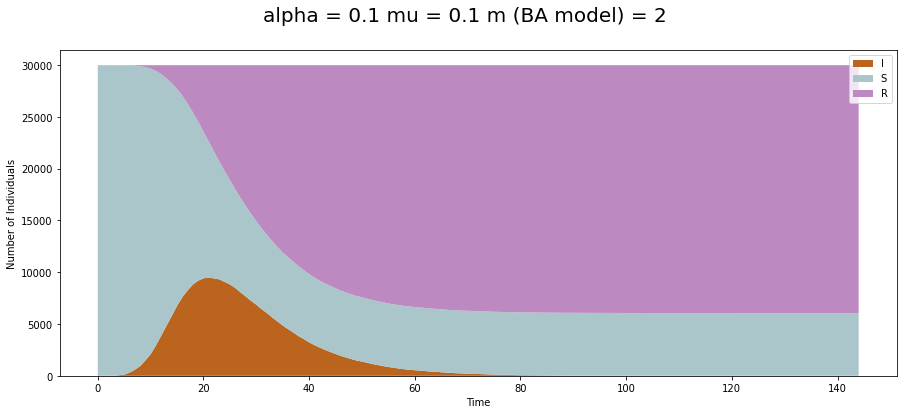

In [ ]:
  alpha = infectiousness
  mu = recovery_speed
  if(Super_spreaders==True):
    m = super_spread_connectivity
    G = nx.barabasi_albert_graph(n, m)
  else:
    if(p!=connectivity):
      G = nx.erdos_renyi_graph(n, connectivity)
      p = connectivity
  init_conditions()
  degrees = [val for (node, val) in G.degree()]
  avg_deg = G.number_of_edges()/n
  num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus()
  x = list(range(0, len(epi_curve_data)))
generate_epidemic_graph()

In [ ]:
print_stats()

R0:  2.0
Peak cases:  9486
Peak time period:  21
Total time periods:  145
Average contacts:  2.0
Healthy left:  6059


In [ ]:
epi_curve_data

[1,
 1,
 3,
 6,
 55,
 118,
 301,
 577,
 929,
 1473,
 2084,
 2914,
 3869,
 4824,
 5775,
 6745,
 7583,
 8245,
 8814,
 9181,
 9414,
 9486,
 9408,
 9315,
 9073,
 8831,
 8490,
 8068,
 7661,
 7245,
 6871,
 6441,
 6063,
 5643,
 5252,
 4860,
 4515,
 4183,
 3836,
 3550,
 3234,
 2964,
 2728,
 2503,
 2307,
 2114,
 1919,
 1772,
 1619,
 1473,
 1375,
 1258,
 1135,
 1038,
 939,
 850,
 775,
 702,
 635,
 577,
 539,
 500,
 454,
 412,
 382,
 344,
 309,
 276,
 246,
 224,
 210,
 189,
 175,
 155,
 138,
 121,
 110,
 98,
 82,
 69,
 60,
 56,
 51,
 47,
 44,
 39,
 35,
 29,
 27,
 26,
 24,
 23,
 20,
 19,
 16,
 16,
 15,
 11,
 11,
 10,
 9,
 8,
 6,
 6,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
#rec_curve_data

In [ ]:
#sup_curve_data